Final Project Submission

Student name: Deon Durrant

Student pace: self paced

Scheduled project review date/time:

Instructor name: Mark Bardour

Business and Data Understanding

The King Isle event coordinator is responsible for organizing and recommending movie screenings for the residents of the island. The coordinator's goal is to ensure that each resident is offered movies they are more inclined to watch and enjoy based on their previous movie preferences. King Isle’s movie recommendation system should be able to provide tailored movie suggestions for each resident, allowing them to have a more enjoyable viewing experience.

Problem Statement:
The event coordinator needs to provide top 5 personalized movie recommendations to each resident based on their previous movie ratings. By analyzing the historical ratings given by residents to other movies, the system should predict which movies each resident would likely enjoy in the future and prioritize the highest-rated ones.

# Exploratory Data Analysis


In [1]:
# Data collection 
import pandas as pd
df = pd.read_csv('ratings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [2]:
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [3]:
# Convert the Unix timestamp to a datetime format
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Extract the year from the datetime
df['year'] = df['datetime'].dt.year

df.head()

,userId,movieId,rating,timestamp,datetime,year
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000


The ratings dataset has 100836 entries in four columns. There are no missing values. 

In [4]:
df.drop(['timestamp', 'datetime'],axis=1, inplace=True)
df.head(5)

,userId,movieId,rating,year
0,1,1,4.0,2000
1,1,3,4.0,2000
2,1,6,4.0,2000
3,1,47,5.0,2000
4,1,50,5.0,2000


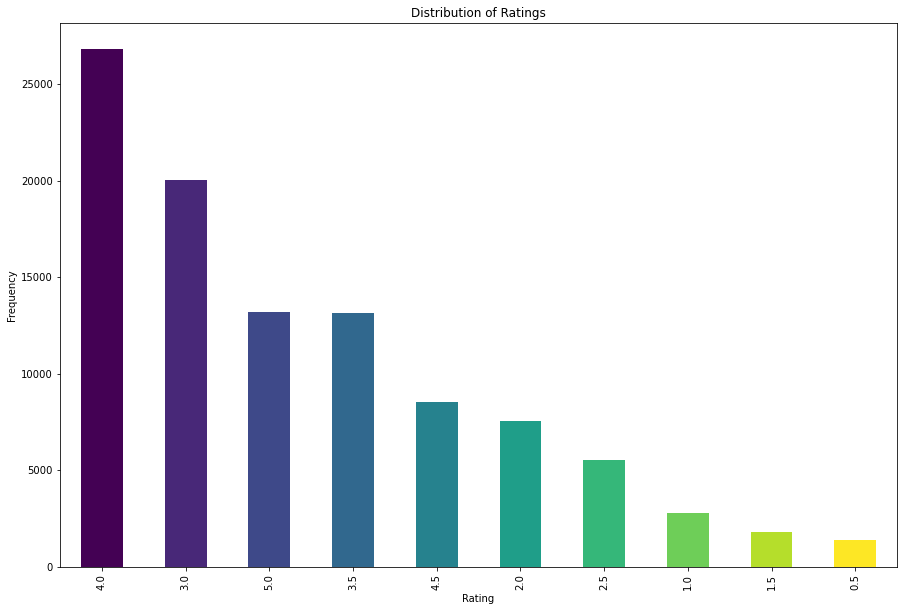

In [5]:
# Explore the rating distribution
import matplotlib.pyplot as plt 
import numpy as np
# visualize the rating column
rating_type= df['rating'].value_counts()
# Establish  figure size
plt.figure(figsize=(15, 10))
num_bars = len(rating_type)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars)) 
# Plot the data
rating_type.plot(kind='bar', color=colors)

# Label the plot
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Show the plot
plt.show()

# Rating Distribution 
Rating are either implicit or explicit. Explicit ratings/feedback occurs when users directly rates the item for example giving a news item the thumbs down. In this case the explicit rating is on a scale 0-5.  Implicit rating/feedback makes assumptions about a user's preference based on their actions towards items for example how long the user interacted with the movies.

The data distributed indicates a positive ratings of movies  are more common. These higher ratings suggests that users are generally satisfied with the  movies. There may be a positive bias in the ratings. The data distibution and business task may influence the model's performance. 
.

In [6]:
# Calculate the percentage distribution of the rating column
rating_percentages = df['rating'].value_counts(normalize=True) * 100

# Display the percentages
print(rating_percentages)

4.0    26.595660
3.0    19.880797
5.0    13.101472
3.5    13.027093
4.5     8.480106
2.0     7.488397
2.5     5.503987
1.0     2.787695
1.5     1.776151
0.5     1.358642
Name: rating, dtype: float64


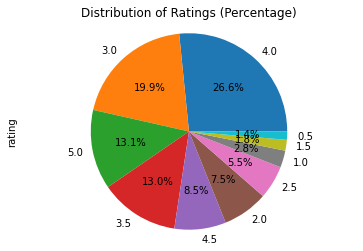

In [7]:
# Visualize the percentage rating 
rating_percentages.plot(kind='pie', autopct='%1.1f%%')

plt.title("Distribution of Ratings (Percentage)")
plt.axis('equal')

# Show the plot
plt.show()

# Ratings Percentage Distribution
Percentage distribution of ratings skews toward higher ratings, which could be an indication of positive bias.

* Ratings 4.0 and above: The combined percentage for ratings 4.0, 4.5, and 5.0 is about 48.17%. 4.0 (26.60%),
* Ratingd 3.0 to 3.5:  Makes  up 32.91% of the ratings 
* Ratings below 3.0: Account for a much smaller portion of the ratings ( 18.91%). 

Implication of this postive bias will likely skew recommendations toward high-rated movies and may not truly reflect the users' diverse preferences.

To address the issue the following strategies can be used .
* Normalization of the ratings  to account for individual user bias toward higher ratings.
* Regularization  of the ALS model to reduce the impact of extreme ratings.

 # Distribution of ratings across users
To understand the distribution of the number of ratings across many users the histogram will be used 

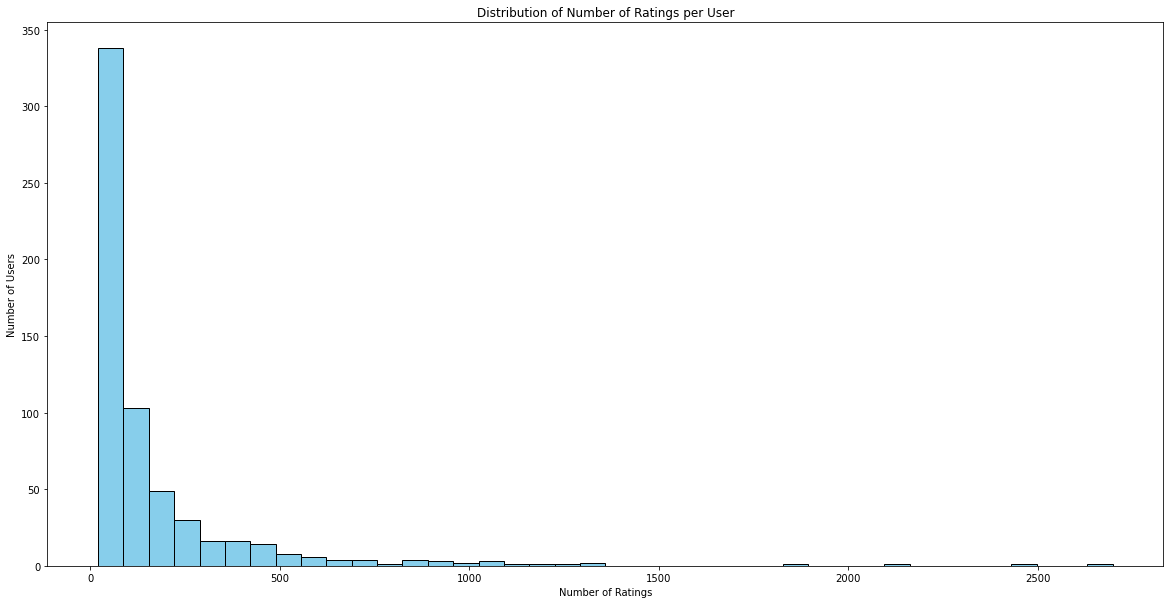

In [8]:
# Count the number of ratings per user
gb_user=df['userId'].value_counts()
# Plot the  distribution of the number of ratings by user
plt.figure(figsize=(20, 10))
plt.hist(gb_user, bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

# Distribution of Ratings Across Users

The majority of users fall into the first bin, suggesting that many users might have rated few movies. This suggest low engagement in terms of ratings. Since users maybe rating fewer items this maybe leading to sparse datasets. In contrast there are fewer user have with high rating engagements which could have a significant impact on the recommendation model. 

 To address sparsity matrix factorization techniques like Alternating Least Squares will be used. 

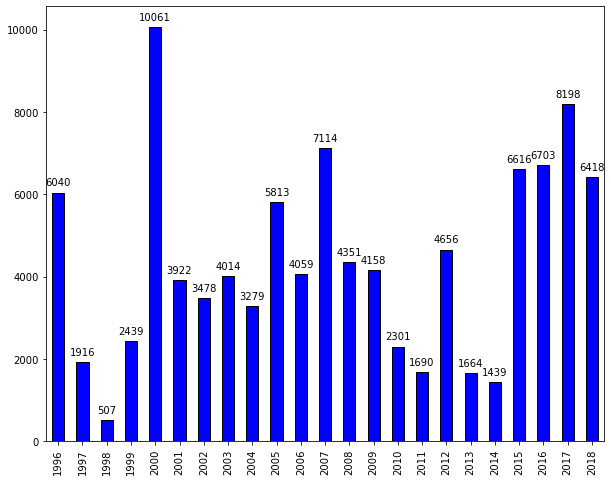

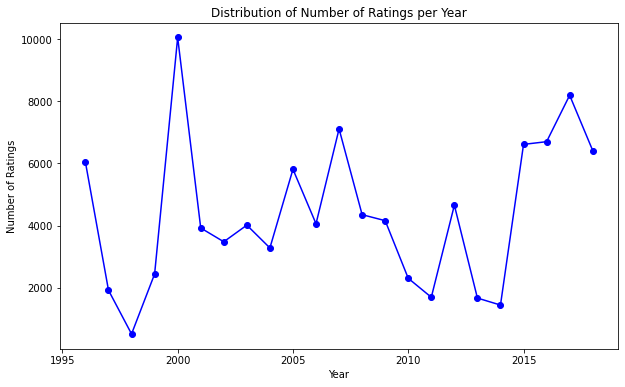

In [9]:
# Count the number of ratings per year
gb_year=df['year'].value_counts().sort_index()
# Plot the  distribution of the number of ratings by year
plt.figure(figsize=(10, 8))

ax=gb_year.plot(kind='bar',    linestyle='-',color='blue', edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    # Plot a line graph to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(gb_year.index, gb_year.values, marker='o', linestyle='-', color='b')


plt.title("Distribution of Number of Ratings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

# Model selection

To address the business problem collabiarative filtering approaches will be considered. 

## Collaborative filtering Approaches
* User-based filtering- recommends items to the target user based on preferences of other users.
* Item based filtering - recommends new items to the target user based on the user’s previous interactions with similar items
* Model based CF Model-based approach creates a predictive machine learning model of the data. The present values in the utility matrix are used as the training data while predictions are made on the interactions that are yet to occur. 

Model based collaborative filtering will be used to address the business problem,  specifically  parks from MLlib. 

In [10]:
#Importing the required pyspark library 
from pyspark.sql import SparkSession  
import numpy as np 

In [11]:
from pyspark.sql import SparkSession 
# Initialize  spark session 
 
spark = SparkSession.builder.appName('Recommender').getOrCreate() 
spark

# Load and prepare data

In [12]:
# Read data from the ratings dataset . 
ratings_data = spark.read.csv('ratings.csv', inferSchema=True,header=True) 
ratings_data.show(5) 

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows



In [13]:
from pyspark.sql.functions import from_unixtime, year

# Convert  timestamp to year
ratings_df = ratings_data.withColumn('year', year(from_unixtime('timestamp'))).drop('timestamp')

# Show the result
ratings_df.show(5)

+------+-------+------+----+
|userId|movieId|rating|year|
+------+-------+------+----+
|     1|      1|   4.0|2000|
|     1|      3|   4.0|2000|
|     1|      6|   4.0|2000|
|     1|     47|   5.0|2000|
|     1|     50|   5.0|2000|
+------+-------+------+----+
only showing top 5 rows



In [14]:
# Describe dataset
ratings_df.describe().show()

+-------+------------------+----------------+------------------+------------------+
|summary|            userId|         movieId|            rating|              year|
+-------+------------------+----------------+------------------+------------------+
|  count|            100836|          100836|            100836|            100836|
|   mean|326.12756356856676|19435.2957177992| 3.501556983616962|2007.7226189059463|
| stddev| 182.6184914635004|35530.9871987003|1.0425292390606342| 6.890283870015307|
|    min|                 1|               1|               0.5|              1996|
|    max|               610|          193609|               5.0|              2018|
+-------+------------------+----------------+------------------+------------------+



All 100,836 movie entries have a rating, with maximum rating of 5 and minimum of 0.5. There are 610 user ids indicating that users are rating multiple movies.The average rating is 3.5.

In [15]:
# Read data from the movies dataset . 
movies_data = spark.read.csv('movies.csv', inferSchema=True,header=True) 
movies_data=movies_data.na.drop()
movies_data.show(5) 

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows




# Train A Model

## Import the Alternating Least Squares(ALS) Method and apply it.


* rank: the number of latent factors in the model (defaults to 10).
* maxIter:  is the maximum number of iterations to run (defaults to 10).
* regParam: specifies the regularization parameter in ALS (defaults to 1.0).
* implicitPrefs:  specifies whether to use the explicit feedback or  implicit feedback data (defaults to false - means using explicit feedback).
* nonnegative: specifies whether or not to use nonnegative constraints for least squares (defaults to false).

In [16]:
# Split and train  ratings dataset
# Dividing the data using random split into train_data 80%  and test_data 20%  
train_data, test_data = ratings_df.randomSplit([0.8, 0.2])

In [17]:
# Import the Alternating Least Squares(ALS) Method and apply it.
from pyspark.ml.recommendation import ALS 
# Build the recommendation model using ALS  default params on the training data 
als = ALS( coldStartStrategy="drop", # to address cold start problem 
          userCol="userId",
          itemCol="movieId", 
          ratingCol="rating",
          seed=42) 

#Fitting the model on the train_data 
model = als.fit(train_data)

# Cold Start Strategy
Cold start issues arise when there is insufficient data to match users with items. This can happen in several situations
* new users or items that have no rating history and on which the model has not been trained
* encounter users and/or items in the evaluation set that are not in the training set
* sparse interaction as some users or items may be present in the training data but have very few interactions

These situtions can result in poor generalization, weak predictions, and potential overfitting on items with high user interactions. to address the issue  coldStartStrategy="drop"  to remove any rows in the DataFrame of predictions that contain NaN values.

# Make Predictions with  Model
The trained model can be used to predict ratings with a given test data.

In [18]:
# Create predictions on the test data 
predictions = model.transform(test_data) 

#Displaying predictions calculated by the model 
predictions.show(5)

+------+-------+------+----+----------+
|userId|movieId|rating|year|prediction|
+------+-------+------+----+----------+
|   463|   1088|   3.5|2006| 3.2969856|
|   137|   1580|   3.5|2008|  2.967803|
|   580|   1580|   4.0|2007|  3.565384|
|   133|    471|   4.0|1996|  2.992971|
|   597|    471|   2.0|1999| 4.4672985|
+------+-------+------+----+----------+
only showing top 5 rows



# Predictions 
* For higher actual ratings (e.g., 5. the model tends to predict lower values (e.g., 3.52). This suggests the model might not fully capture the user’s strong preference for certain items, leading to underprediction.

* For lower actual ratings (e.g., 2.0 or 2.5), the model sometimes predicts higher values (e.g., 3.72 or 1.01). This might indicate that the model is overestimating the user’s interest in some items, particularly for lower ratings.

* The model seems to perform reasonably well for mid-range ratings (e.g., 3.5)

# Model Evaluations

In [19]:
from pyspark.ml.evaluation import RegressionEvaluator 

#Create evaluator for each metric 
rmse_evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",predictionCol="prediction") 
mae_evaluator = RegressionEvaluator(metricName="mae", labelCol="rating", predictionCol="prediction")


# Calculate the metrics
rmse = rmse_evaluator.evaluate(predictions)
mae = mae_evaluator.evaluate(predictions)

# Print the results
print("Root Mean Square Error RMSE = " + str(rmse))

print("Mean Absolute Error (MAE) = "+ str(mae))


Root Mean Square Error RMSE = 0.8826576786973522
Mean Absolute Error (MAE) = 0.6787120202001515


Interpretation

The evaluation metrics measure the accuracy of the model's prediction.

 RMSE = 0.88
 
* The root mean square error penalizes larger errors more than smaller errors, therefore a smaller RMSE is a more accurate measure when the goal is to minimize the effects of large errors. 

* RMSE provides a sense of how far the predictions are from the actual values. 
    
MAE=0.68
 
* Mean absolute errors MAE measures the averages of the absolute differences between predicted and actual values, without penalizing larger errors more.
* Lower MAE measure indicates a better performing model.
    
The model performance indicates there maybe some errors in the predictions. To address the issue the model will be hypertuned to find the best parameters. 